# Variance, Covariance, & Correlation

[Mastering Time-Series Analysis & Forecasting - Episode 4](https://youtu.be/TiXJ2bL0Yeg)


# Variance 

This example demonstrates: 
- How to calcualte variance using "numpy" library.
- How the variance changes significantly due to the added outliers and how these outliers visually impact the dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Creation:
- The first time series (values_no_outliers) is generated with random values from a normal distribution.
- The second time series (values_with_outliers) introduces outliers by adding a large value to every 10th day.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a time series of values without outliers
np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values_no_outliers = np.random.normal(loc=50, scale=5, size=100)
time_series_no_outliers = pd.Series(data=values_no_outliers, index=date_range)

# Generate a time series of values with fewer outliers
values_with_outliers = values_no_outliers.copy()
outlier_indices = [0, 20, 50, 80]  # Add outliers at specific points
values_with_outliers[outlier_indices] += 20  # Increase values to create outliers
time_series_with_outliers = pd.Series(data=values_with_outliers, index=date_range)


## Calculate the Variance

In [23]:
# Calculate variance for both series
variance_no_outliers = np.var(values_no_outliers)
variance_with_outliers = np.var(values_with_outliers)

# Define normal range (mean ± 2 * standard deviation)
mean_no_outliers = np.mean(values_no_outliers)
std_no_outliers = np.std(values_no_outliers)
normal_range_no_outliers = (mean_no_outliers - 2 * std_no_outliers, mean_no_outliers + 2 * std_no_outliers)

mean_with_outliers = np.mean(values_with_outliers)
std_with_outliers = np.std(values_with_outliers)
normal_range_with_outliers = (mean_with_outliers - 2 * std_with_outliers, mean_with_outliers + 2 * std_with_outliers)

# Identify outliers
outliers_with_outliers = time_series_with_outliers[(time_series_with_outliers < normal_range_with_outliers[0]) |
                                                   (time_series_with_outliers > normal_range_with_outliers[1])]

# Print variances and normal ranges
print(f"Variance without outliers: {variance_no_outliers:.2f}")
print(f"Normal range without outliers: {normal_range_no_outliers}")
print(f"Variance with outliers: {variance_with_outliers:.2f}")
print(f"Normal range with outliers: {normal_range_with_outliers}")



Variance without outliers: 20.41
Normal range without outliers: (40.44460564658324, 58.516929179475824)
Variance with outliers: 40.74
Normal range with outliers: (37.51559964860445, 63.04593517745462)


# Visualize the Two Time-series

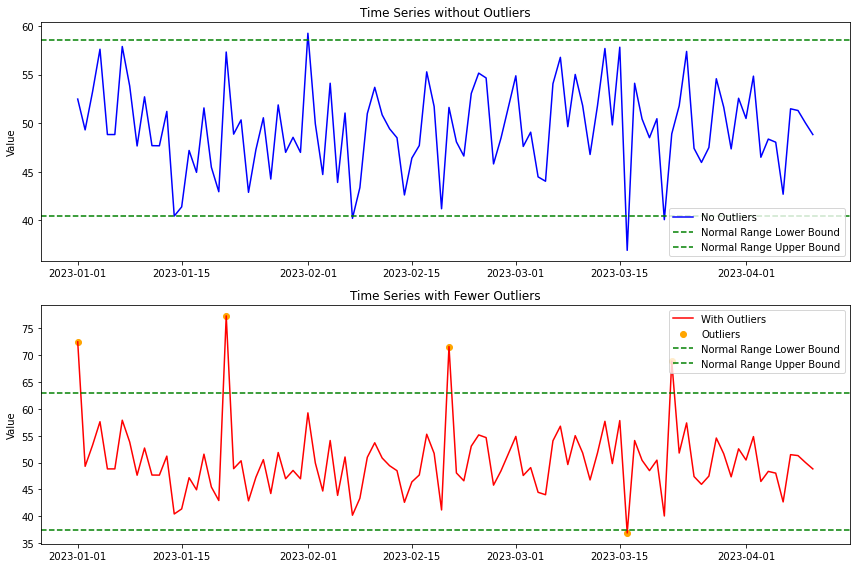

In [24]:
# Visualize both time series
plt.figure(figsize=(12, 8))

# Time series without outliers
plt.subplot(2, 1, 1)
plt.plot(time_series_no_outliers, label="No Outliers", color="blue")
plt.axhline(normal_range_no_outliers[0], color="green", linestyle="--", label="Normal Range Lower Bound")
plt.axhline(normal_range_no_outliers[1], color="green", linestyle="--", label="Normal Range Upper Bound")
plt.title("Time Series without Outliers")
plt.ylabel("Value")
plt.legend()

# Time series with outliers
plt.subplot(2, 1, 2)
plt.plot(time_series_with_outliers, label="With Outliers", color="red")
plt.scatter(outliers_with_outliers.index, outliers_with_outliers.values, color="orange", label="Outliers")
plt.axhline(normal_range_with_outliers[0], color="green", linestyle="--", label="Normal Range Lower Bound")
plt.axhline(normal_range_with_outliers[1], color="green", linestyle="--", label="Normal Range Upper Bound")
plt.title("Time Series with Fewer Outliers")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# # Time series without outliers
# plt.figure(figsize=(12, 8))
# plt.subplot(2, 1, 1)
# plt.plot(time_series_no_outliers, label="Time-series", color="purple")
# plt.axhline(time_series_no_outliers.min(), color="green", linestyle="--", label="Lower Bound")
# plt.axhline(time_series_no_outliers.mean(), color="red", linestyle="--", label="Mean")
# plt.axhline(time_series_no_outliers.max(), color="green", linestyle="--", label="Upper Bound")
# plt.title("Time Series")
# plt.ylabel("Value")
# plt.legend()

# Standard Deviation

In [28]:
import numpy as np
# Example data
data = [10, 12, 14, 16, 18, 20]
# Calculate STD using NumPy
std_dev = np.std(data)

print(f"Standard Deviation using NumPy: {std_dev}")


Standard Deviation using NumPy: 3.415650255319866


# Covariance

The scatter plot below illustrates the relationship between two variables, X and Y, which have a positive covariance of approximately 1.53. This positive covariance indicates that as X increases, Y tends to increase as well, showing a directional relationship between the two variables.
In this case, Y is linearly related to X with some added noise, which is why the points form a general upward trend. The covariance value quantifies this relationship by measuring how much the variables vary together

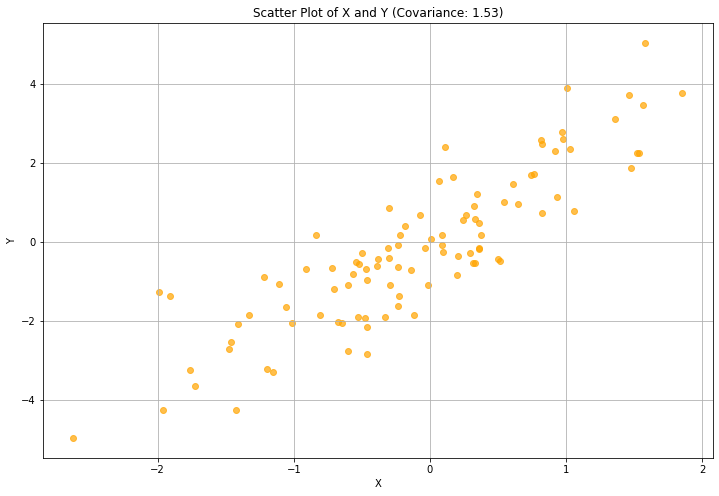

Covariance: 1.531385594421482


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Create two random variables (data sets)
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)  # y is related to x, with some noise

# Create a pandas DataFrame
data = pd.DataFrame({'X': x, 'Y': y})

# Calculate the covariance between X and Y
covariance = data.cov().iloc[0, 1]

# Plot the data to visually show the relationship
plt.scatter(data['X'], data['Y'], alpha=0.7, color="orange")
plt.title(f'Scatter Plot of X and Y (Covariance: {covariance:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

print(f"Covariance: {covariance}")


## Covariance Example

Example below demonstrates the concept of covariance, using the example of two investments' returns.

Positive Covariance

Covariance Matrix:
              Investment A  Investment B
Investment A       0.00313       0.00406
Investment B       0.00406       0.00532



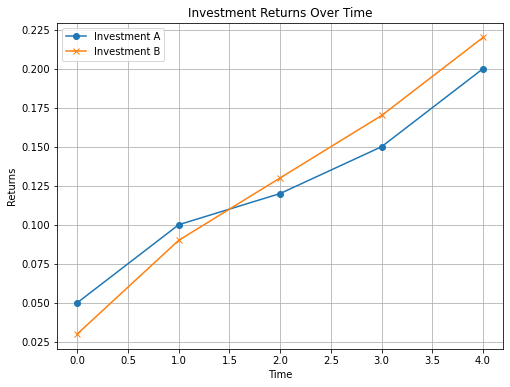

The covariance between Investment A and Investment B is: 0.00406


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example investment returns for two different assets (e.g., stock A and stock B)
investment_A = [0.05, 0.10, 0.12, 0.15, 0.20]
investment_B = [0.03, 0.09, 0.13, 0.17, 0.22]


# Create a DataFrame to hold the data
data = pd.DataFrame({
    'Investment A': investment_A,
    'Investment B': investment_B
})

# Calculate the covariance matrix
cov_matrix = data.cov()
print(f"Covariance Matrix:\n{cov_matrix}\n")

# Visualize the returns of both investments
plt.figure(figsize=(8, 6))
plt.plot(data['Investment A'], label='Investment A', marker='o')
plt.plot(data['Investment B'], label='Investment B', marker='x')
plt.title('Investment Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Extract the covariance between Investment A and Investment B
cov_ab = cov_matrix.loc['Investment A', 'Investment B']
print(f"The covariance between Investment A and Investment B is: {cov_ab}")


Explanation:
Covariance is calculated using pandas.DataFrame.cov() method. It gives you the relationship between two variables.
- If the covariance is positive, it means that as one investment increases in value, the other one tends to do the same (move in the same direction).
- If the covariance is negative, it means the investments tend to move in opposite directions; when one goes up, the other goes down.
- If the covariance is close to zero, it suggests there is no strong relationship between the two investments' returns.

### Negative Covariance 

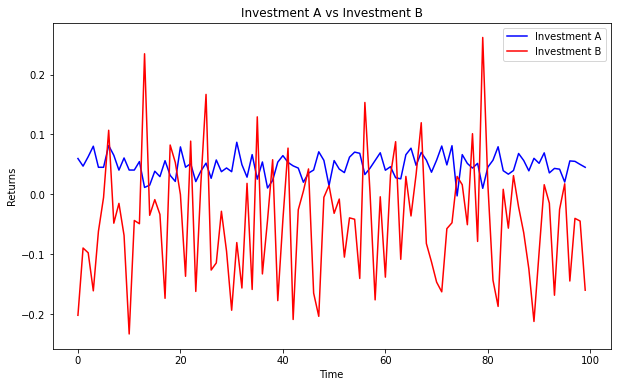

Covariance between Investment A and Investment B: -0.0005662163431297381


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random data for Investment A
np.random.seed(42)  # For reproducibility
investment_a = np.random.normal(0.05, 0.02, size=100)  # Mean return 0.05, Std Dev 0.02

# Modify the data for Investment B to have an inverse relationship with Investment A
investment_b = investment_a * -1 + np.random.normal(0, 0.1, size=100)  # Inverse relationship

# Create a DataFrame for visualization
data = pd.DataFrame({
    'Investment A': investment_a,
    'Investment B': investment_b
})

# Plot both investments
plt.figure(figsize=(10, 6))
plt.plot(data['Investment A'], label='Investment A', color='blue')
plt.plot(data['Investment B'], label='Investment B', color='red')
plt.title('Investment A vs Investment B')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Calculate covariance
covariance = np.cov(investment_a, investment_b)[0, 1]
print(f"Covariance between Investment A and Investment B: {covariance}")


# Correlation

In [44]:
import pandas as pd
import numpy as np

# Sample data
x = np.random.rand(100)
y = x + np.random.normal(0, 0.1, 100)  # Adding noise to x for positive correlation

# Creating a DataFrame
df = pd.DataFrame({'X': x, 'Y': y})

# Calculating the correlation
correlation = df.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation)


Correlation matrix:
          X         Y
X  1.000000  0.941013
Y  0.941013  1.000000


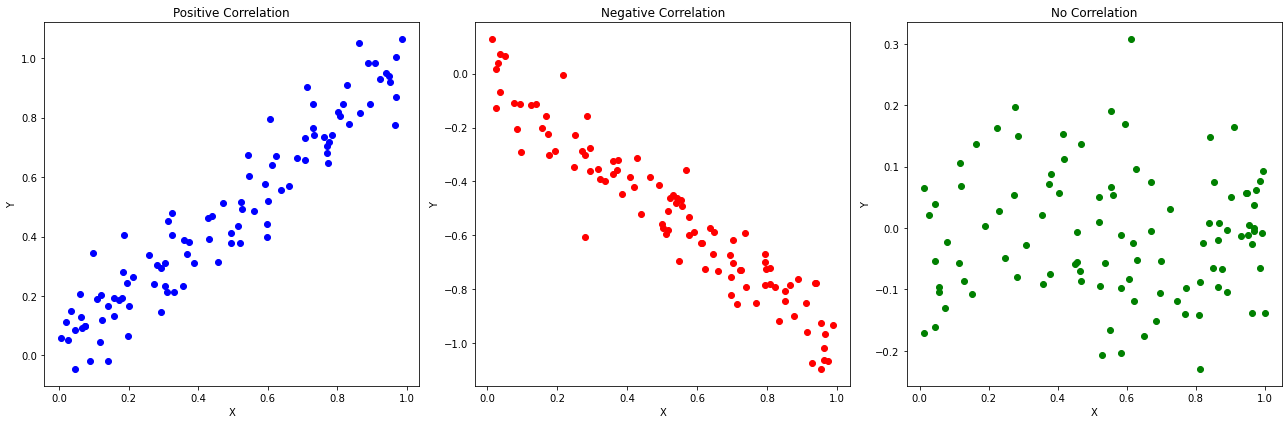

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating data for correlation cases
np.random.seed(42)

# Positive correlation
x_pos = np.random.rand(100)
y_pos = x_pos + np.random.normal(0, 0.1, 100)  # y increases as x increases

# Negative correlation
x_neg = np.random.rand(100)
y_neg = -x_neg + np.random.normal(0, 0.1, 100)  # y decreases as x increases

# No correlation
x_no = np.random.rand(100)
y_no = np.random.normal(0, 0.1, 100)  # Random noise, no correlation

# Creating DataFrames for better visualization
df_pos = pd.DataFrame({'X': x_pos, 'Y': y_pos})
df_neg = pd.DataFrame({'X': x_neg, 'Y': y_neg})
df_no = pd.DataFrame({'X': x_no, 'Y': y_no})

# Plotting the data
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Positive correlation plot
axs[0].scatter(df_pos['X'], df_pos['Y'], color='blue')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Negative correlation plot
axs[1].scatter(df_neg['X'], df_neg['Y'], color='red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

# No correlation plot
axs[2].scatter(df_no['X'], df_no['Y'], color='green')
axs[2].set_title('No Correlation')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')

plt.tight_layout()
plt.show()


## Calculate Correlation using corr() function

In [45]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Example housing dataset (replace this with your actual data)
data = {
    'Price': [250000, 320000, 150000, 500000, 420000, 275000, 350000],
    'Size': [1500, 1800, 1200, 2500, 2100, 1600, 2200],  # Square footage
    'Bedrooms': [3, 4, 2, 5, 4, 3, 4],
    'Age': [10, 5, 20, 3, 8, 15, 6],  # Age of the house in years
}

# Creating a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the dataset
print("Housing Data:")
print(df)

# Calculating the Pearson correlation matrix 
correlation_matrix = df.corr()

# Displaying the correlation matrix
print("\nCorrelation Matrix (Pearson's r):")
print(correlation_matrix)

# Example of accessing the correlation between two specific columns
price_size_correlation = df['Price'].corr(df['Size'])
print("\nCorrelation between Price and Size:", price_size_correlation)


Housing Data:
    Price  Size  Bedrooms  Age
0  250000  1500         3   10
1  320000  1800         4    5
2  150000  1200         2   20
3  500000  2500         5    3
4  420000  2100         4    8
5  275000  1600         3   15
6  350000  2200         4    6

Correlation Matrix (Pearson's r):
             Price      Size  Bedrooms       Age
Price     1.000000  0.963796  0.960833 -0.842371
Size      0.963796  1.000000  0.958790 -0.858275
Bedrooms  0.960833  0.958790  1.000000 -0.943699
Age      -0.842371 -0.858275 -0.943699  1.000000

Correlation between Price and Size: 0.9637956414771356


### Correlation Usage

- In Finance:To assess how two assets move in relation to each other, helping investors to diversify their portfolios.


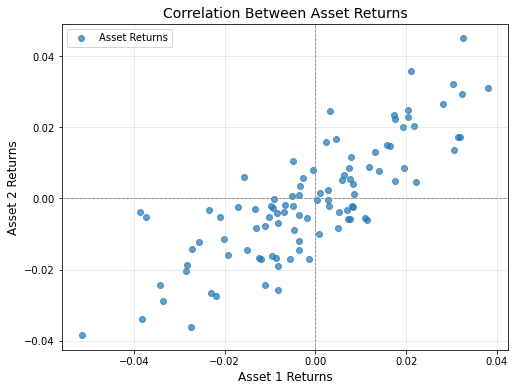

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data: Returns of two assets
np.random.seed(42)
asset1 = np.random.normal(0.001, 0.02, 100)  # Simulating returns for Asset 1
asset2 = 0.8 * asset1 + np.random.normal(0, 0.01, 100)  # Asset 2 correlated with Asset 1

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(asset1, asset2, alpha=0.7, label="Asset Returns")
plt.title("Correlation Between Asset Returns", fontsize=14)
plt.xlabel("Asset 1 Returns", fontsize=12)
plt.ylabel("Asset 2 Returns", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


- In Marketing: Understanding the relationship between advertising spend and sales performance.


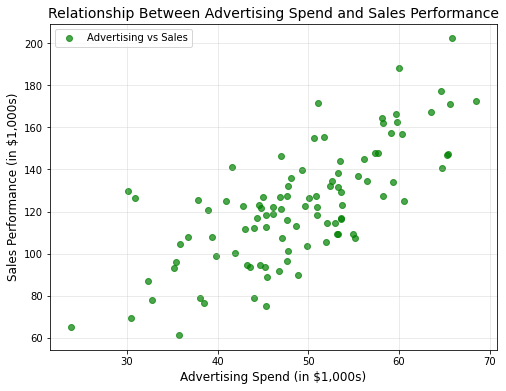

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data: Advertising spend and sales performance
np.random.seed(42)
advertising_spend = np.random.normal(50, 10, 100)  # Simulating advertising spend in thousands
sales_performance = 2.5 * advertising_spend + np.random.normal(0, 20, 100)  # Sales influenced by advertising + noise

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(advertising_spend, sales_performance, alpha=0.7, label="Advertising vs Sales", color='green')
plt.title("Relationship Between Advertising Spend and Sales Performance", fontsize=14)
plt.xlabel("Advertising Spend (in $1,000s)", fontsize=12)
plt.ylabel("Sales Performance (in $1,000s)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


# Autocorrelation

If we are interested in examining the linear dependence between rt and its past values rt−i​, the concept of correlation is generalized to autocorrelation.

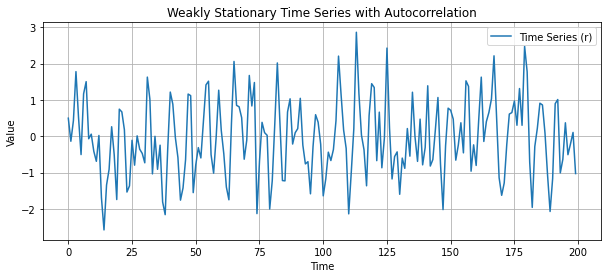

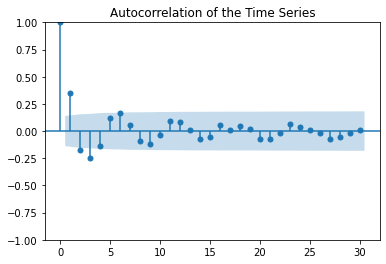

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate a weakly stationary time series
np.random.seed(42)
n = 200  # Number of observations
r = np.random.normal(0, 1, n)  # White noise (weakly stationary)

# Add some autocorrelation by including past values
for t in range(2, n):
    r[t] += 0.5 * r[t - 1] - 0.3 * r[t - 2]

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(r, label="Time Series (r)")
plt.title("Weakly Stationary Time Series with Autocorrelation")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Plot the autocorrelation function
plot_acf(r, lags=30, title="Autocorrelation of the Time Series")
plt.show()


## Autocorrelation Function (ACF)
Example that demonstrates how to compute and plot the autocorrelation function (ACF) using the statsmodels library. This will be a good tutorial for understanding autocorrelation in time series data.

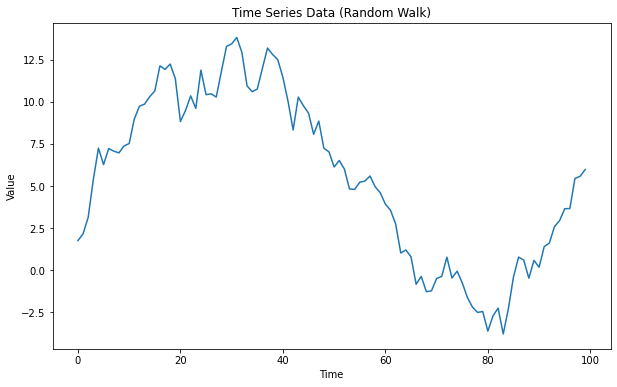

<Figure size 720x432 with 0 Axes>

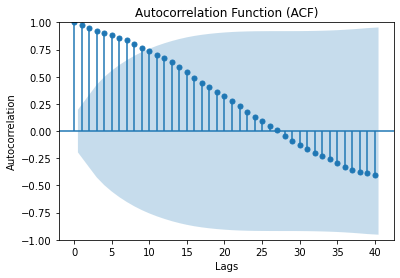

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate a sample time series data (e.g., random walk)
np.random.seed(0)  # For reproducibility
n = 100  # Length of time series
data = np.random.randn(n).cumsum()  # Cumulative sum to simulate random walk

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Time Series Data (Random Walk)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(data, lags=40)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


### 1. Decay Pattern (Stationary Process, e.g., Stock Returns)

In finance, the daily returns of a stock are often stationary, meaning they fluctuate around a mean without any significant long-term trend. This leads to a rapid decay in autocorrelation after a short lag.

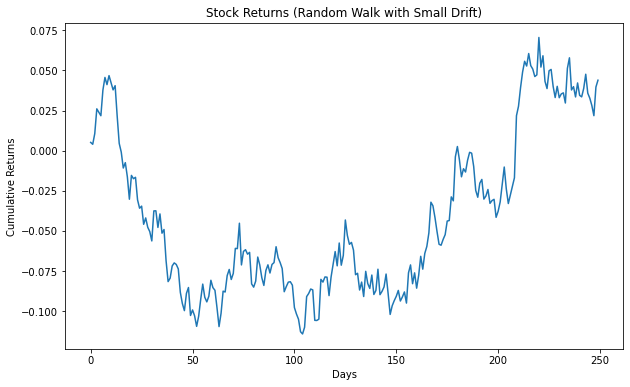

<Figure size 720x432 with 0 Axes>

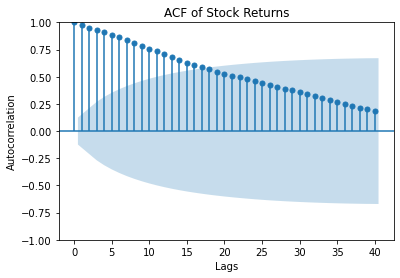

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Simulate daily returns for a stock (random walk with small drift)
np.random.seed(42)
n = 250  # Number of trading days (approximately 1 year)
drift = 0.0002  # Small daily drift
noise = np.random.normal(0, 0.01, n)  # Random daily return
stock_returns = np.cumsum(noise + drift)  # Cumulative sum to simulate stock returns

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(stock_returns)
plt.title("Stock Returns (Random Walk with Small Drift)")
plt.xlabel("Days")
plt.ylabel("Cumulative Returns")
plt.show()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(stock_returns, lags=40)
plt.title("ACF of Stock Returns")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Interpretation:
- The ACF plot will show a rapid decay, indicating that the returns do not exhibit long-term dependence and are "memoryless" after a few lags, which is typical for stock returns in efficient markets.

### 2. Seasonality (Marketing Campaign Data)

In marketing, sales data often exhibit seasonal patterns. For example, if you're tracking monthly sales, you might observe peaks at specific lags, like a yearly seasonality cycle (e.g., peak sales every December).

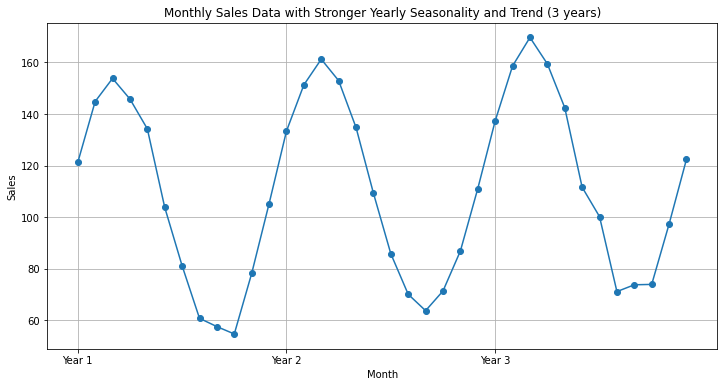

<Figure size 864x432 with 0 Axes>

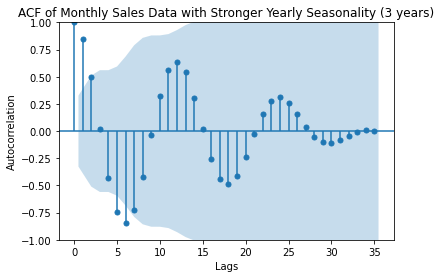

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Simulate 3 years of monthly sales data with stronger seasonality (clear yearly cycle)
months = np.arange(1, 37)  # 36 months (3 years)
seasonality = 50 * np.sin(2 * np.pi * months / 12)  # Stronger yearly sine wave
trend = np.linspace(100, 120, 36)  # Slow upward trend for 3 years
sales_data = trend + seasonality + np.random.normal(0, 3, 36)  # Sales data with seasonality and trend

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(months, sales_data, marker='o')
plt.title("Monthly Sales Data with Stronger Yearly Seasonality and Trend (3 years)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(np.arange(1, 37, 12), [f"Year {i}" for i in range(1, 4)])  # Label each year
plt.grid(True)
plt.show()

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(sales_data, lags=35)  # Calculate autocorrelation for lags 0-35
plt.title("ACF of Monthly Sales Data with Stronger Yearly Seasonality (3 years)")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Interpretation:
The ACF plot will show periodic peaks, especially at lag 12 (12 months), indicating a yearly seasonal pattern. This is common in marketing where sales might peak in specific months each year (e.g., holiday season).


### 3. Trend (Stock Prices with a Trend)

Stock prices can exhibit long-term trends due to factors like company performance, macroeconomic conditions, etc. This leads to a slowly decaying ACF because the series has a strong correlation with its past values over many periods.

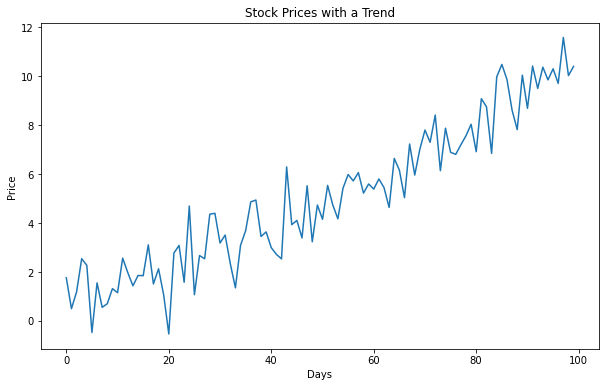

<Figure size 720x432 with 0 Axes>

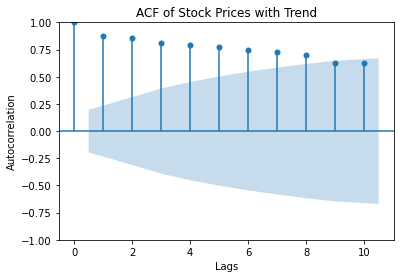

In [29]:
# Simulate stock prices with a trend (e.g., growing company stock)
np.random.seed(0)
n = 100  # Number of days
trend = np.linspace(0, 10, n)  # Increasing trend (e.g., stock growth)
noise = np.random.normal(0, 1, n)  # Random noise
stock_prices_with_trend = trend + noise  # Stock price with trend

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(stock_prices_with_trend)
plt.title("Stock Prices with a Trend")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(stock_prices_with_trend, lags=10)
plt.title("ACF of Stock Prices with Trend")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Interpretation:
- The ACF plot will show a slowly decaying correlation, indicating a long-range dependence in the series due to the underlying trend. The autocorrelations at higher lags will remain significantly positive, suggesting the stock price is correlated with past values.

### 4. White Noise (Random Marketing Spend Data)
White noise refers to a time series where each value is independent and not related to past values. In marketing, this could represent random fluctuations in advertising spend.

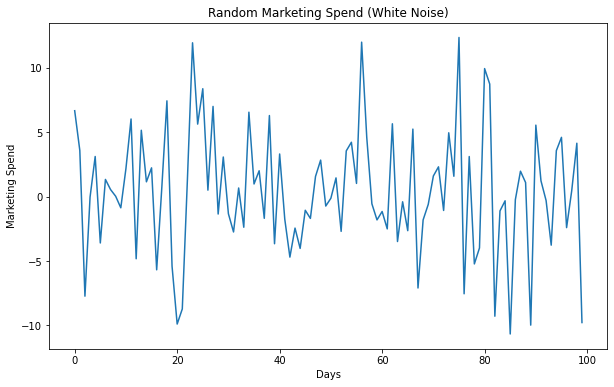

<Figure size 720x432 with 0 Axes>

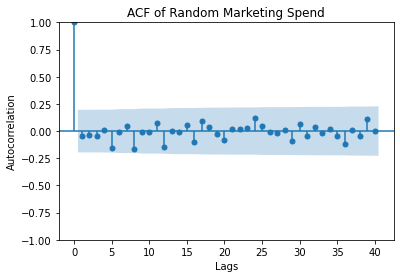

In [17]:
# Simulate random marketing spend data (white noise)
np.random.seed(10)
n = 100  # Number of observations
marketing_spend = np.random.normal(0, 5, n)  # Random noise

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(marketing_spend)
plt.title("Random Marketing Spend (White Noise)")
plt.xlabel("Days")
plt.ylabel("Marketing Spend")
plt.show()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(marketing_spend, lags=40)
plt.title("ACF of Random Marketing Spend")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


### How ACF Works

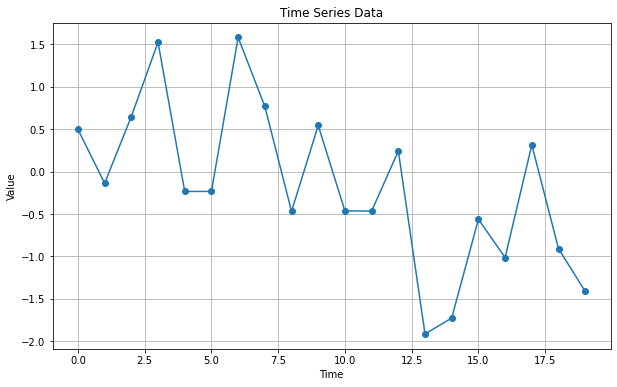

<Figure size 720x432 with 0 Axes>

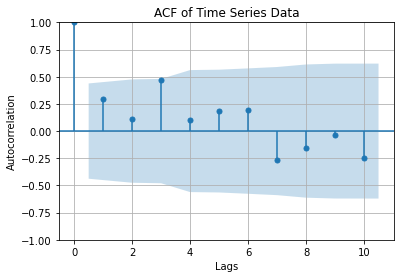

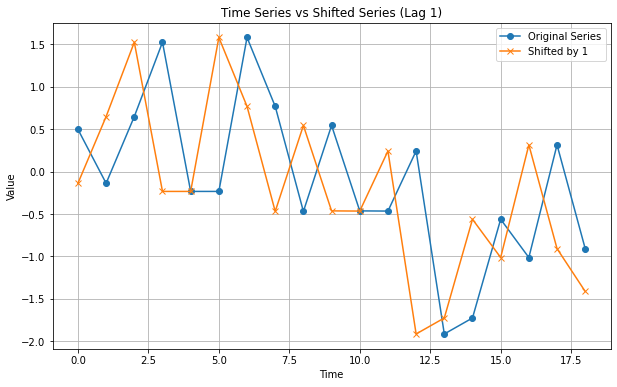

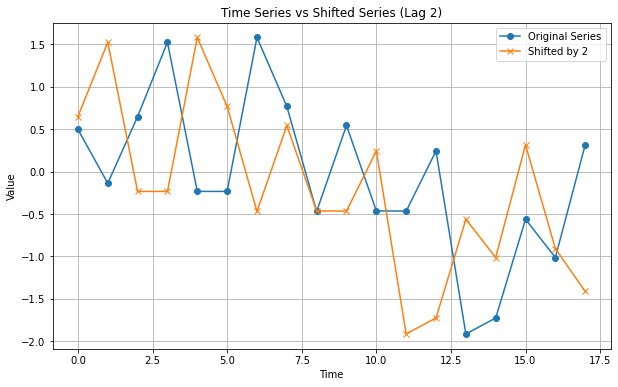

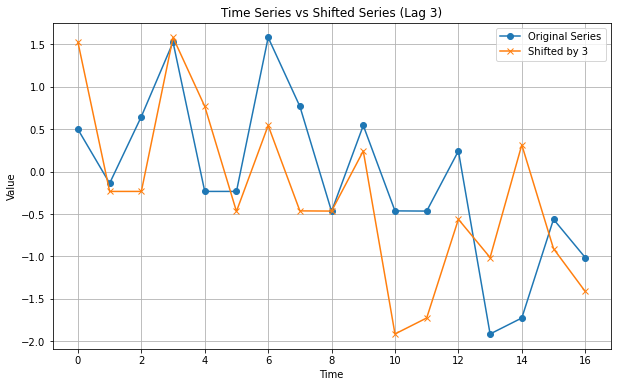

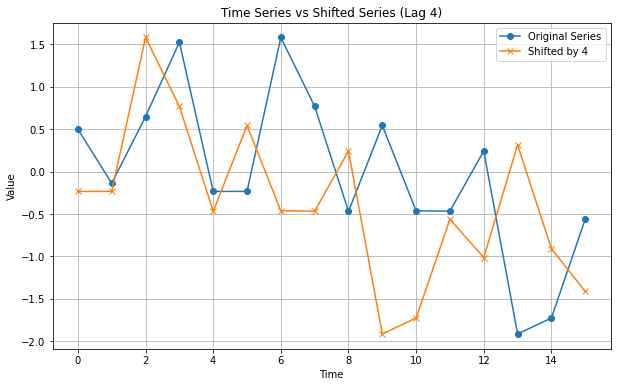

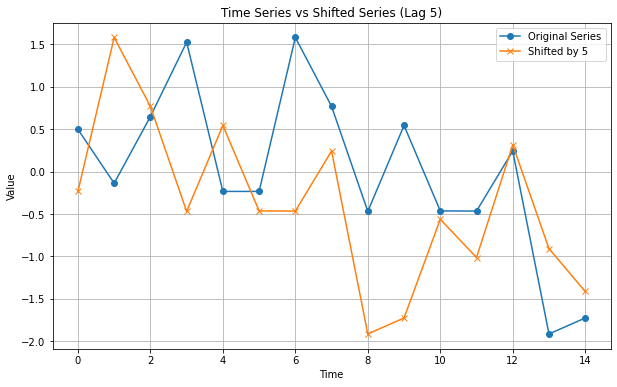

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Simulate 20 data points for time series
np.random.seed(42)
N = 20
time_series = np.random.randn(N)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, marker='o')
plt.title("Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=10)  # Calculate ACF for lags 0 to 10
plt.title("ACF of Time Series Data")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# To illustrate the changing window size, plot the first few lags
for lag in range(1, 6):  # Showing for lag 1 to 5
    plt.figure(figsize=(10, 6))
    
    # Define the shift
    shifted_series = time_series[lag:]
    
    # Plot the original series and the shifted series for the current lag
    plt.plot(time_series[:N-lag], label="Original Series", marker='o')
    plt.plot(shifted_series, label=f"Shifted by {lag}", marker='x')
    plt.title(f"Time Series vs Shifted Series (Lag {lag})")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


# Partial ACF (PACF)

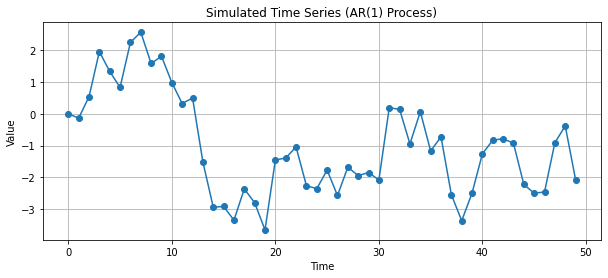

<Figure size 720x432 with 0 Axes>

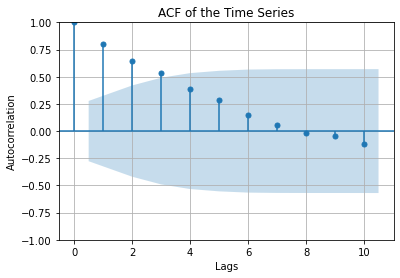

/Users/lighttiger/opt/anaconda3/envs/py38-ml/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

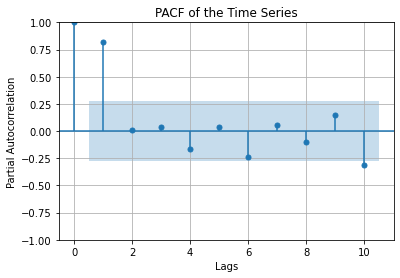

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Simulate a time series (e.g., AR(1) process)
np.random.seed(42)
N = 50
epsilon = np.random.randn(N)  # white noise
alpha = 0.8  # AR(1) coefficient
time_series = np.zeros(N)
for t in range(1, N):
    time_series[t] = alpha * time_series[t-1] + epsilon[t]

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time_series, marker='o')
plt.title("Simulated Time Series (AR(1) Process)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=10)
plt.title("ACF of the Time Series")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=10)
plt.title("PACF of the Time Series")
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.grid(True)
plt.show()
